<a href="https://colab.research.google.com/github/vasilievan/telecom_labs/blob/main/Vasiliev_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-08 12:02:56--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-08 12:02:56--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.009s  

2022-04-08 12:02:56 (4.91 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Упражнение 2


In [ ]:
if not os.path.exists('29530__eliasheuninck__wind1.wav'):
    !wget https://github.com/vasilievan/telecom_labs/raw/main/29530__eliasheuninck__wind1.wav

In [ ]:
from thinkdsp import read_wave

wave = read_wave('29530__eliasheuninck__wind1.wav')
wave.make_audio()

In [ ]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

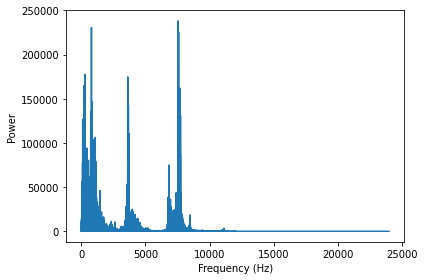

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Из полученного графика видно, что зависимость падения амплитуды от частоты отдаленно
напоминает розовый или белый шум (то есть линейна). Взглянем на спектр мощности в лога-
рифмическом масштабе.

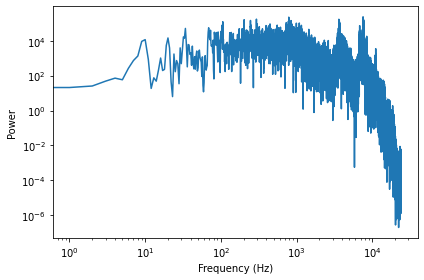

In [ ]:
spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

График сначала возрастает, а потом снова уменьшается.

In [ ]:
segment2 = wave.segment(start=2.5, duration=1.0)
segment2.make_audio()

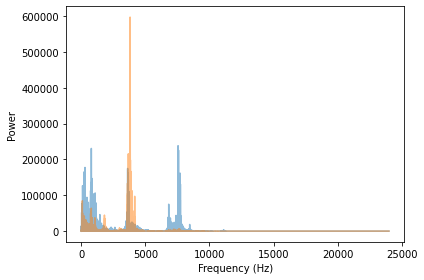

In [ ]:
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

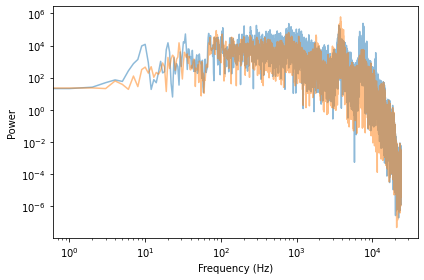

In [ ]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

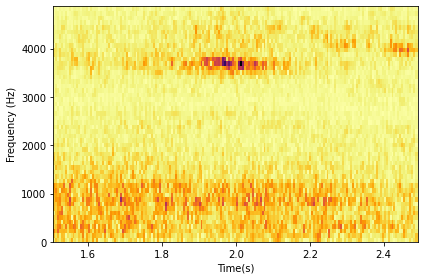

In [ ]:
segment.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Создадим метод barlet_method, который будет брать сигнал, разделять его на сегменты и
вычислять спектр мощности для каждого сегмента и находить среднее по сегментам. Для
этого нужно в аргументы функции передадим сам сигнал и желаемую длину каждого сегмента.
Затем вычислим спектр sp и выделим из него отдельные спекрты specs. Затем выделим массив
psds мощностей из каждого полученного спектра. Вычислим среднюю мощность hs начального
сигнала.


In [ ]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()

    psds = [spectrum.power for spectrum in spectrums]

    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

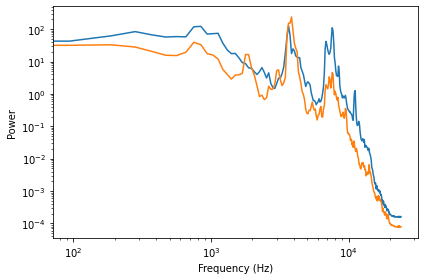

In [ ]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

## Упражнение 3

BTC.csv файл содержит исторические данные о ежедневной цене биткоина за последние пол-
года. Откроем этот файл и вычислим спектр цен как функцию от времени.

In [ ]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

--2022-04-08 12:15:08--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv [following]
--2022-04-08 12:15:09--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143622 (140K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 140.26K  --.-KB/s    in 0.02

In [ ]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', 
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


In [ ]:
ys = df['Closing Price (USD)']
ts = df.index

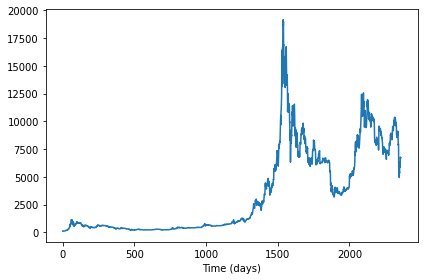

In [ ]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

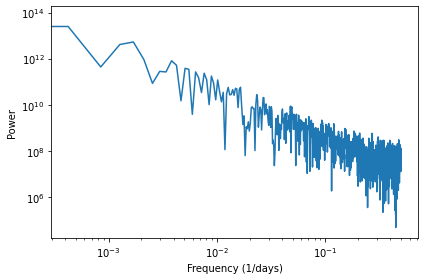

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [ ]:
spectrum.estimate_slope()[0]

-1.7332540936758951

slope примерно равен -2, что соответствует наклону красного шума.

## Упражнение 4


Напишем класс UncorrelatedPoissonNoise, который наследуется от класса thinkdsp._Noise,
который моделирует некоррелированный пуассонвский шум (UP). Для этого переопределим
функцию evaluate, в которой используем метод np.random.poisson(). Параметр этой функ-
ции lam - среднее число частиц за время каждого интервала.

In [ ]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):

        ys = np.random.poisson(self.amp, len(ts))
        return ys

Сгенерируем сигнал с маленькой амплитудой (0.001) на основе этого класса. Ожидается услы-
шать звук, как у счетчика Гейгера.

In [ ]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

In [ ]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 8


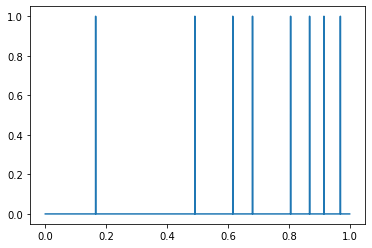

In [ ]:
wave.plot()

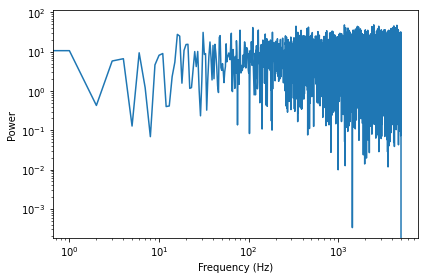

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [ ]:
spectrum.estimate_slope().slope

/content/thinkdsp.py:294: RuntimeWarning: divide by zero encountered in log
  y = np.log(self.power[1:])
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


nan

Создадим такой же сигнал, но с большей амплитудой.

In [ ]:
amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

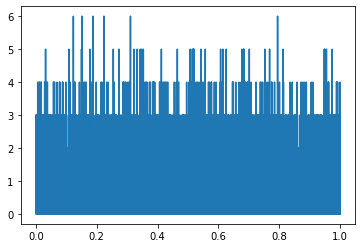

In [ ]:
wave.plot()

In [ ]:
import matplotlib.pyplot as plt

def normal_prob_plot(sample, fit_color='0.8', **options):
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)

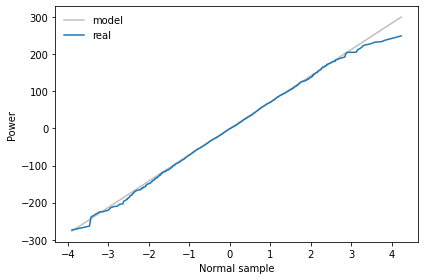

In [ ]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

normal_prob_plot(spectrum.real, label='real')
decorate(xlabel='Normal sample',
        ylabel='Power')

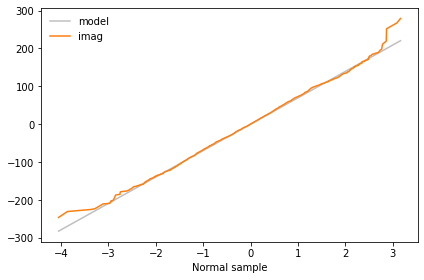

In [ ]:
normal_prob_plot(spectrum.imag, label='imag', color='C1')
decorate(xlabel='Normal sample')

## Упражнение 5

In [ ]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.61333107, 0.33702964, 0.80540485, 0.81565169, 0.49673407],
       [0.60278536,        nan,        nan,        nan,        nan],
       [0.66649055,        nan,        nan,        nan,        nan],
       [0.23308419,        nan,        nan,        nan,        nan],
       [0.56010969,        nan,        nan,        nan,        nan],
       [0.14735808,        nan,        nan,        nan,        nan]])

In [ ]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([2, 3, 4, 2, 2, 1, 2, 3, 0, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 3, 2, 1,
       4, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 2, 1,
       4, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 2, 1,
       1, 4, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 4, 3, 1, 3, 1, 4, 2, 2, 1, 2])

In [ ]:
rows = np.random.randint(nrows, size=n)
rows

array([79, 51, 80, 44,  5, 12, 80, 42, 97, 14, 13, 45, 40, 76, 44, 28, 58,
       83, 93, 34, 26, 88, 34, 17, 24, 57, 87,  6, 45, 13, 91, 83, 28, 26,
        3, 79, 63, 31, 40,  8, 56, 31, 57, 50, 80, 39, 70, 72, 58, 71, 26,
       86,  6, 11,  1, 23, 57, 67, 65, 39, 78, 43, 22, 70,  3,  4, 55, 66,
       23, 93, 53, 54, 87, 33, 52, 72, 14, 64, 88, 69, 12,  3, 90, 48, 87,
       99, 34, 15, 33, 14, 95,  8, 57, 19, 41, 48, 24, 84,  9, 60])

In [ ]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.61333107, 0.33702964, 0.80540485, 0.81565169, 0.49673407],
       [0.60278536, 0.91261348,        nan,        nan,        nan],
       [0.66649055,        nan,        nan,        nan,        nan],
       [0.23308419, 0.42298515, 0.09855525, 0.65981556,        nan],
       [0.56010969, 0.32607767,        nan,        nan,        nan],
       [0.14735808,        nan, 0.25961923,        nan,        nan]])

In [ ]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.613331,0.337030,0.805405,0.815652,0.496734
1,0.602785,0.912613,NaN,NaN,NaN
2,0.666491,NaN,NaN,NaN,NaN
3,0.233084,0.422985,0.098555,0.659816,NaN
4,0.560110,0.326078,NaN,NaN,NaN


In [ ]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.613331,0.337030,0.805405,0.815652,0.496734
1,0.602785,0.912613,0.805405,0.815652,0.496734
2,0.666491,0.912613,0.805405,0.815652,0.496734
3,0.233084,0.422985,0.098555,0.659816,0.496734
4,0.560110,0.326078,0.098555,0.659816,0.496734


In [ ]:
total = filled.sum(axis=1)
total.head()

0    3.068151
1    3.633189
2    3.696895
3    1.911174
4    2.141292
dtype: float64

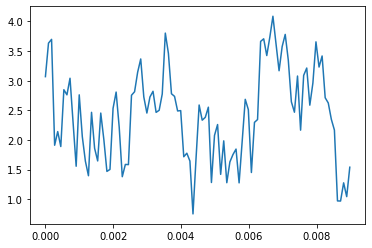

In [ ]:
wave = Wave(total.values)
wave.plot()

Реализуем алгоритм Voss-McCArtney.

In [ ]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [ ]:
ys = voss(11025)
ys

array([6.12694777, 6.55530719, 6.49118506, ..., 8.63531383, 8.32892683,
       8.35285941])

In [ ]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

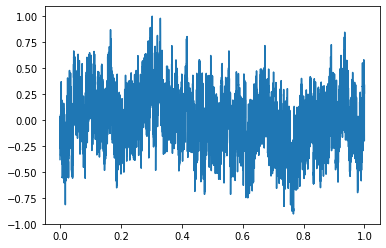

In [ ]:
wave.plot()

In [ ]:
wave.make_audio()

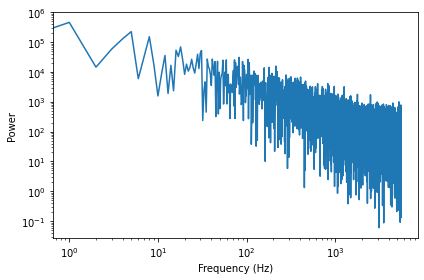

In [ ]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [ ]:
spectrum.estimate_slope().slope

-0.9707955385280218

In [ ]:
seg_length = 64 * 1024
iters = 100
wave = Wave(voss(seg_length * iters))
len(wave)

6553600

In [ ]:
spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

32769

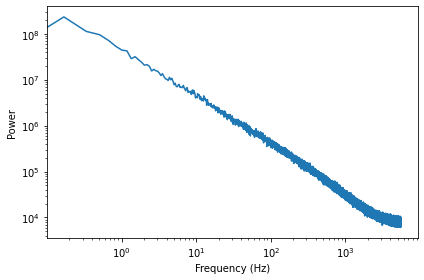

In [ ]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [ ]:
spectrum.estimate_slope().slope

-1.0020613235890785